In [42]:
import numpy as np
from glob import glob
import itertools
from skimage.io import imread, imshow
from skimage.feature import canny
from skimage.filters import sobel, laplace, prewitt, roberts
from scipy import ndimage as ndi
import cv2
import matplotlib.pyplot as plt

### Export Images

In [2]:
images_path = glob('images/*.jpg')

In [3]:
images_path

['images/гриб.jpg',
 'images/images.jpg',
 'images/здание.jpg',
 'images/рентген.jpg']

In [6]:
images = list(map(imread, images_path))

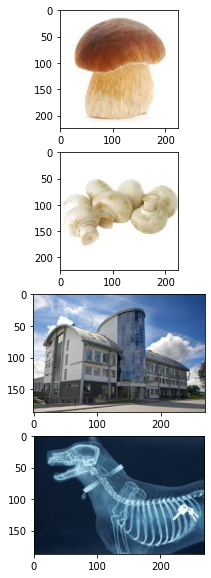

In [7]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    axs[idx].imshow(image);

## Canny algorithm

In [12]:
def canny_segmentation(image, sigma=1, plot_edges=True, ax=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = canny(gray, sigma)
    
    if plot_edges:
        ax.imshow(edges);
    
    return edges

### Default parameters

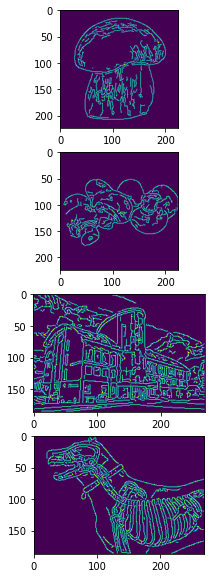

In [14]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    canny_segmentation(image, ax=axs[idx])

### Experiments with sigma 

In [17]:
sigma_range = range(1, 10)

In [18]:
edges_images = [[canny_segmentation(img, sigma=sig, plot_edges=False) for sig in sigma_range]
               for img in images]

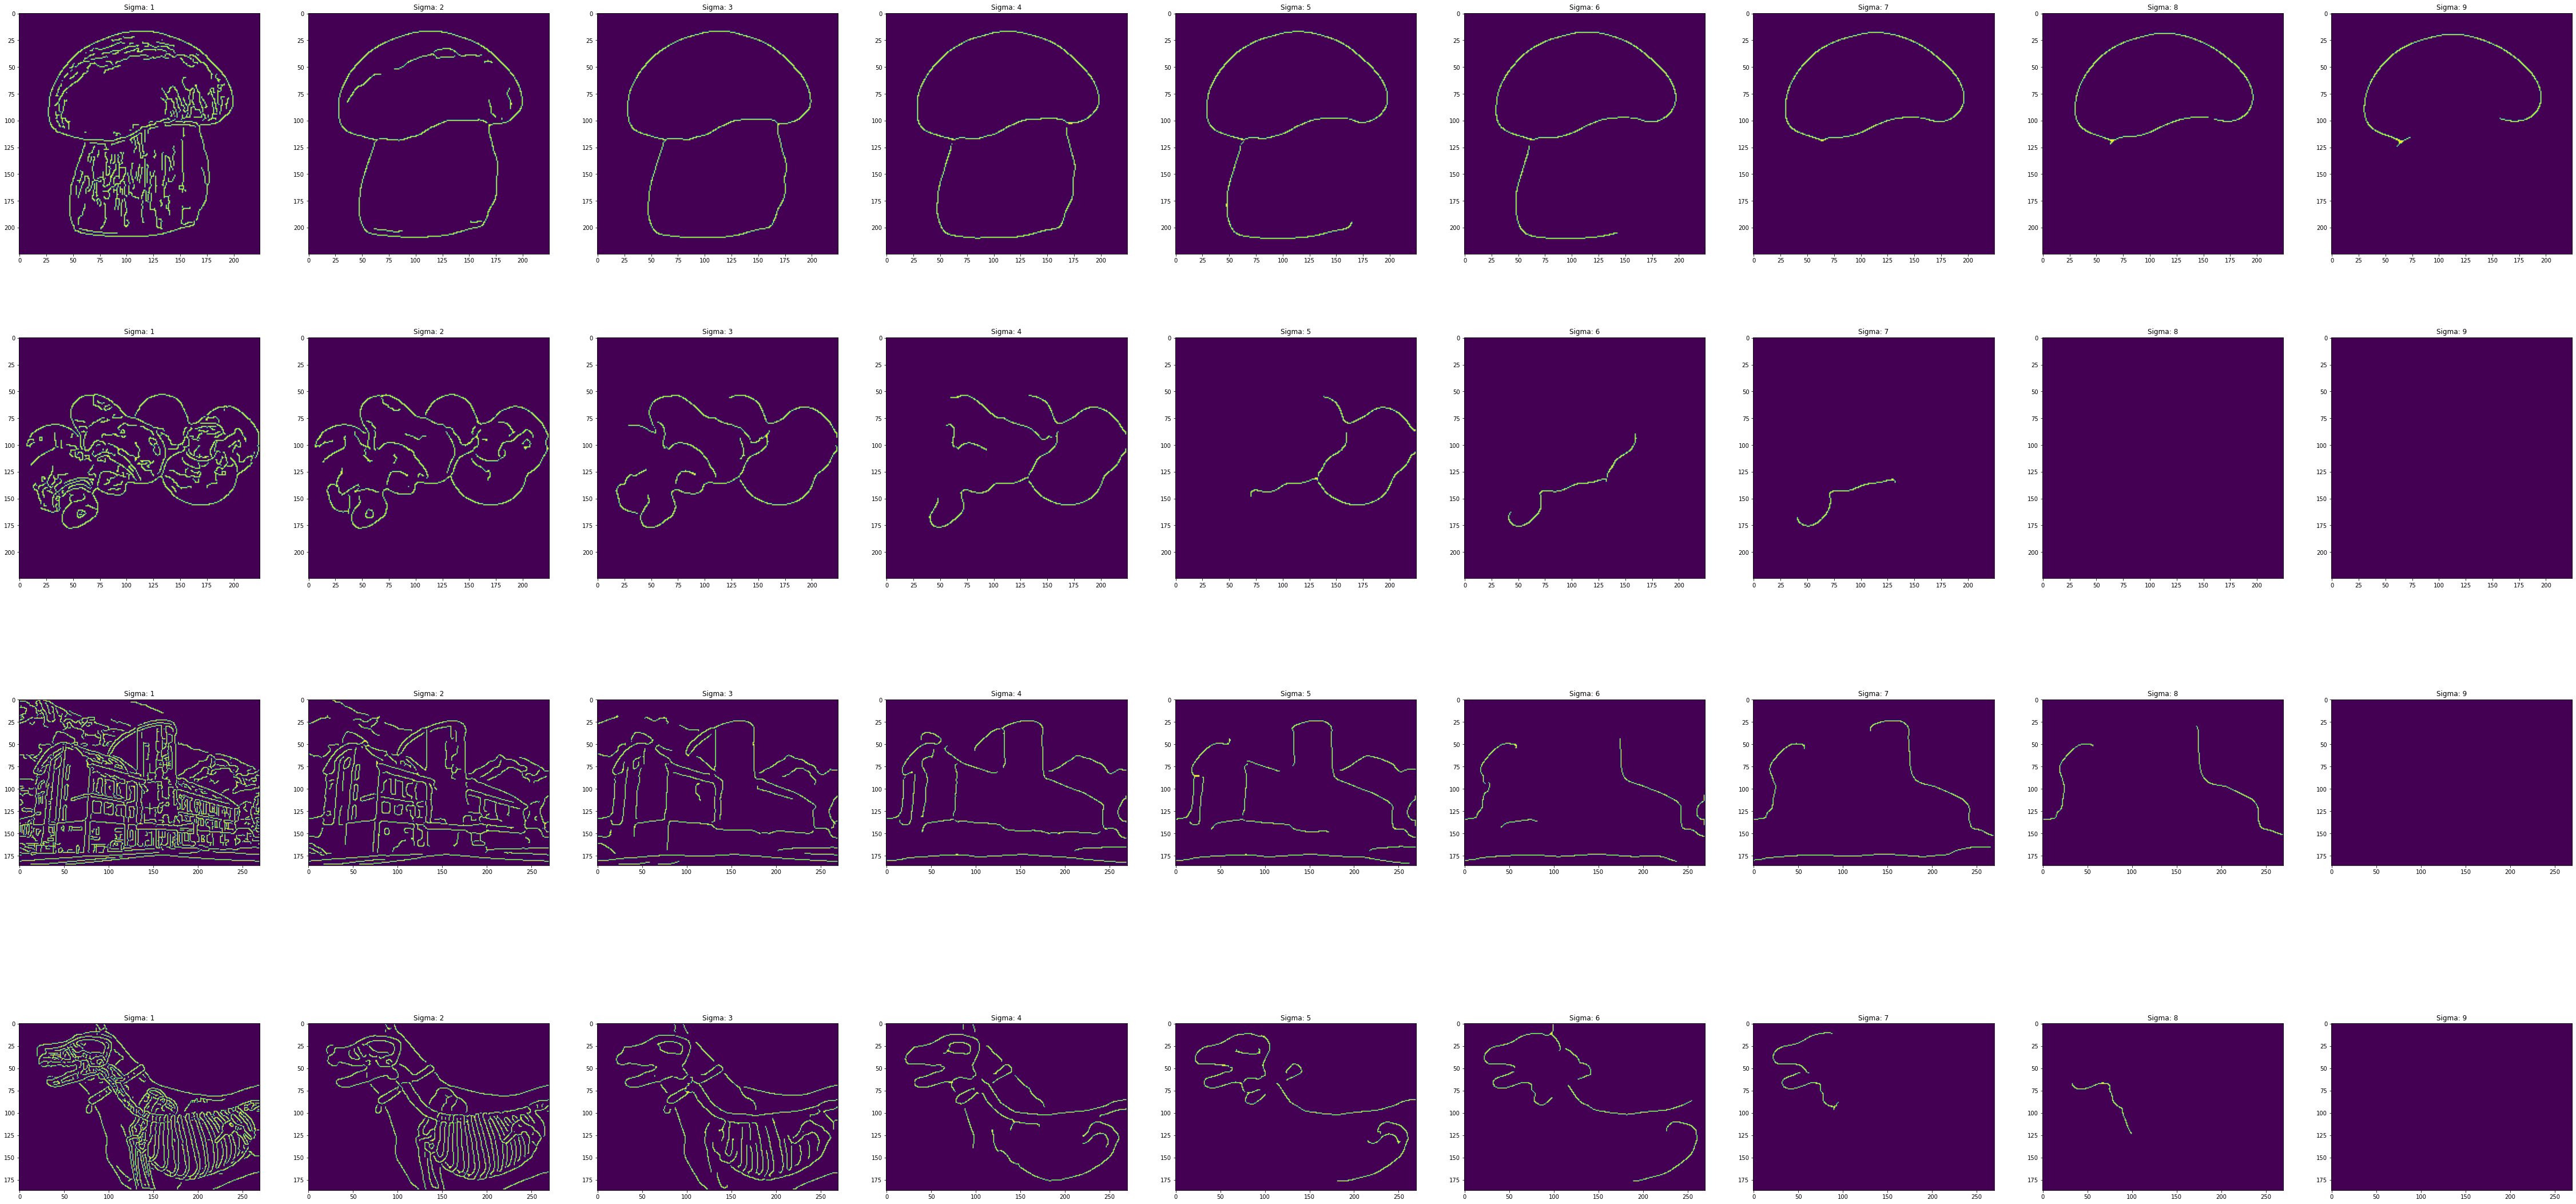

In [24]:
fig, axs = plt.subplots(nrows=len(images), ncols=len(sigma_range), figsize=(80, 40))

for i, j in itertools.product(range(len(images)), range(len(sigma_range))):
    axs[i][j].imshow(edges_images[i][j]);
    axs[i][j].set_title('Sigma: {}'.format(sigma_range[j]))

### More detailed for each image

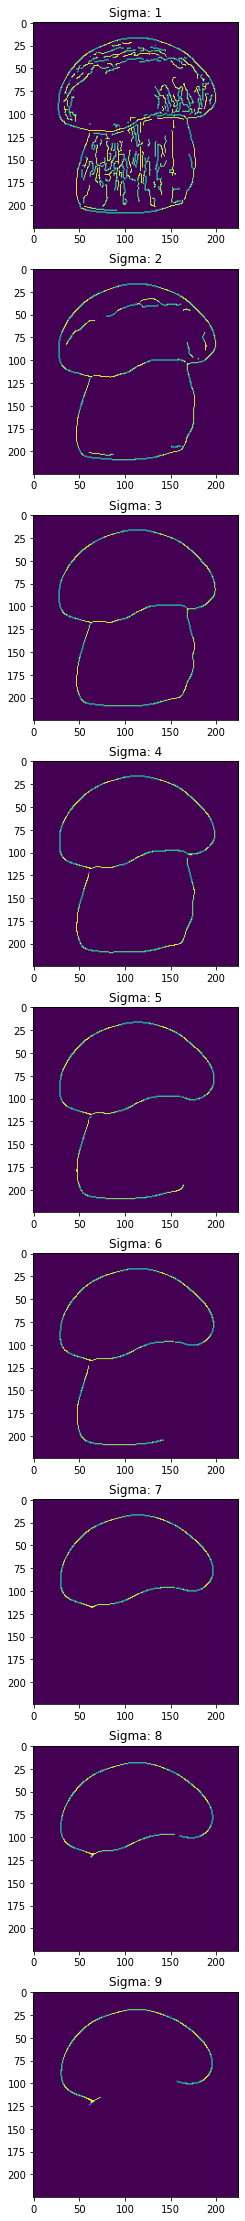

In [30]:
fig, axs = plt.subplots(nrows=len(sigma_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(edges_images[0]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Sigma: {}'.format(sigma_range[idx]))

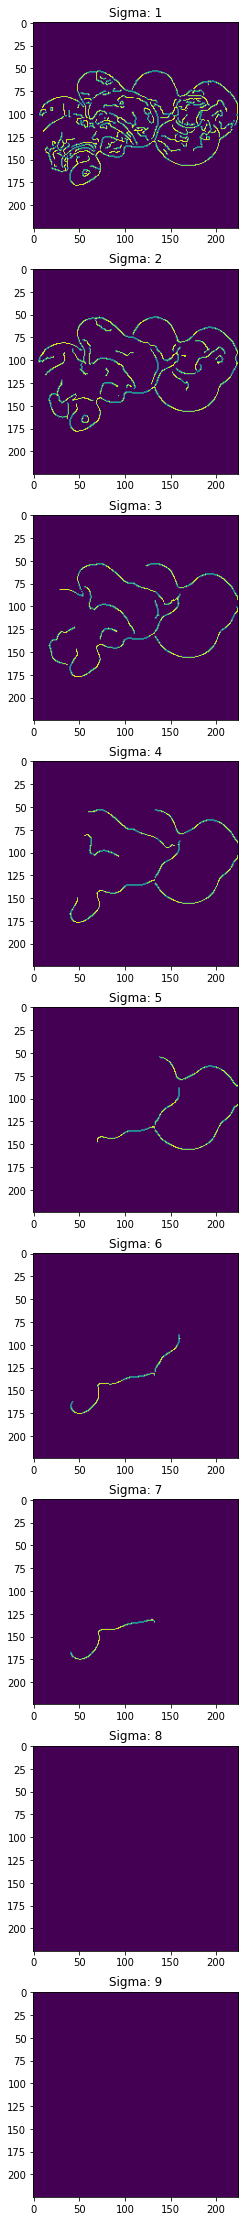

In [31]:
fig, axs = plt.subplots(nrows=len(sigma_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(edges_images[1]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Sigma: {}'.format(sigma_range[idx]))

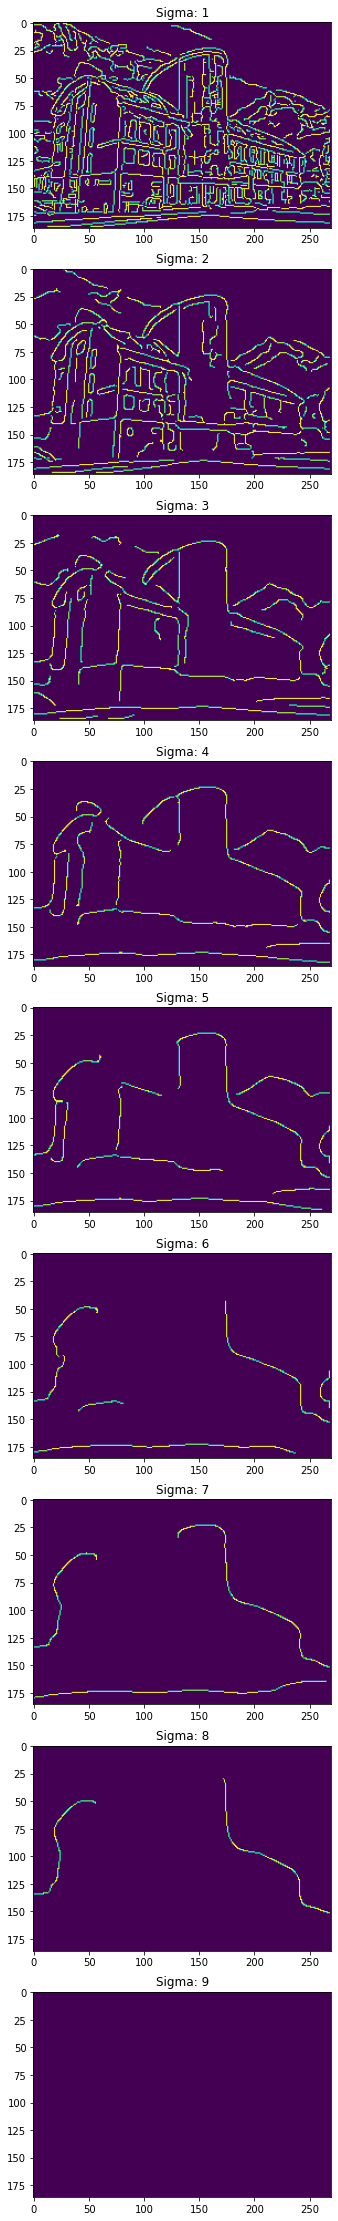

In [32]:
fig, axs = plt.subplots(nrows=len(sigma_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(edges_images[2]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Sigma: {}'.format(sigma_range[idx]))

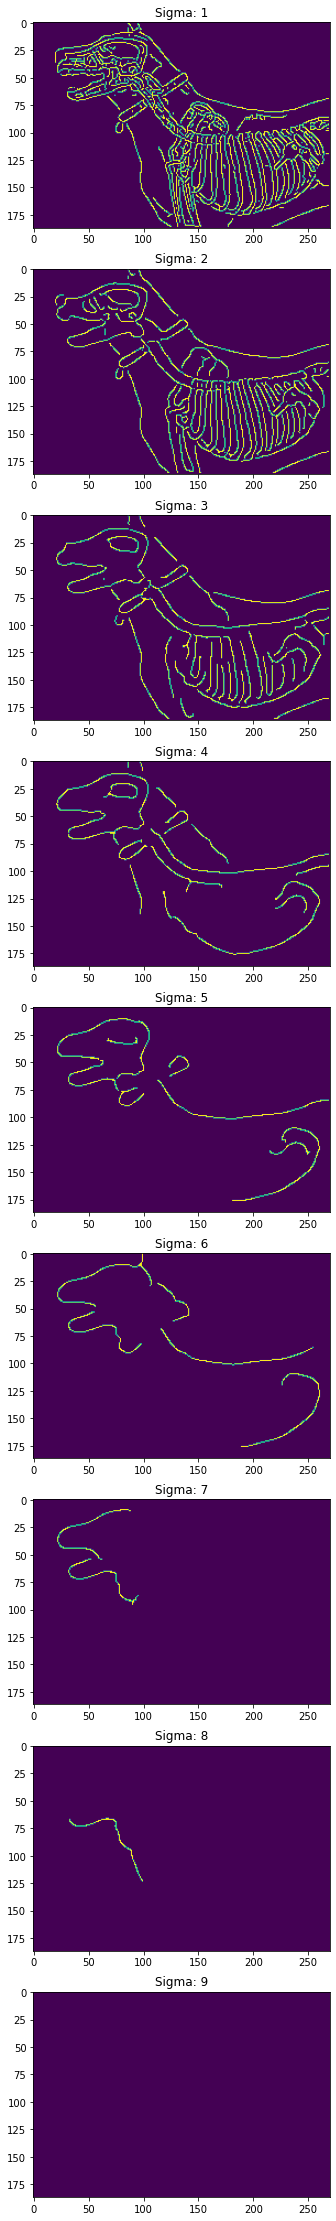

In [34]:
fig, axs = plt.subplots(nrows=len(sigma_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(edges_images[3]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Sigma: {}'.format(sigma_range[idx]))

less sigma - more detailed edge detection

## Sobel

In [38]:
def sobel_segmentation(image, plot_edges=True, ax=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    elevation_map = sobel(gray)
    
    if plot_edges:
        ax.imshow(elevation_map);
    
    return elevation_map

In [40]:
sobel_edges_images = list(map(lambda x: sobel_segmentation(x, plot_edges=False), images))

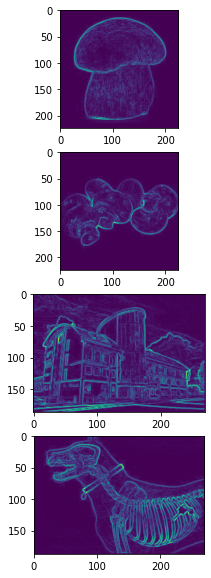

In [41]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    sobel_segmentation(image, ax=axs[idx])

## Laplace operator

In [77]:
def laplace_segmentation(image, kernel_size=3, plot_edges=True, ax=None):
    edges = laplace(image, ksize=kernel_size)
    
    if plot_edges:
        ax.imshow(edges);
    
    return edges

### Default parameters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


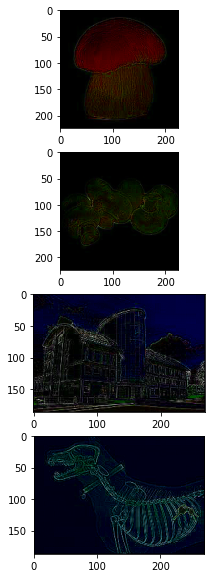

In [78]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    laplace_segmentation(image, ax=axs[idx])

### Experiments with kernle size

In [79]:
ksize_range = range(3, 10)

In [80]:
laplace_edges_images = [[laplace_segmentation(img, kernel_size=kernel_size, plot_edges=False) 
                         for kernel_size in ksize_range]
                        for img in images]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

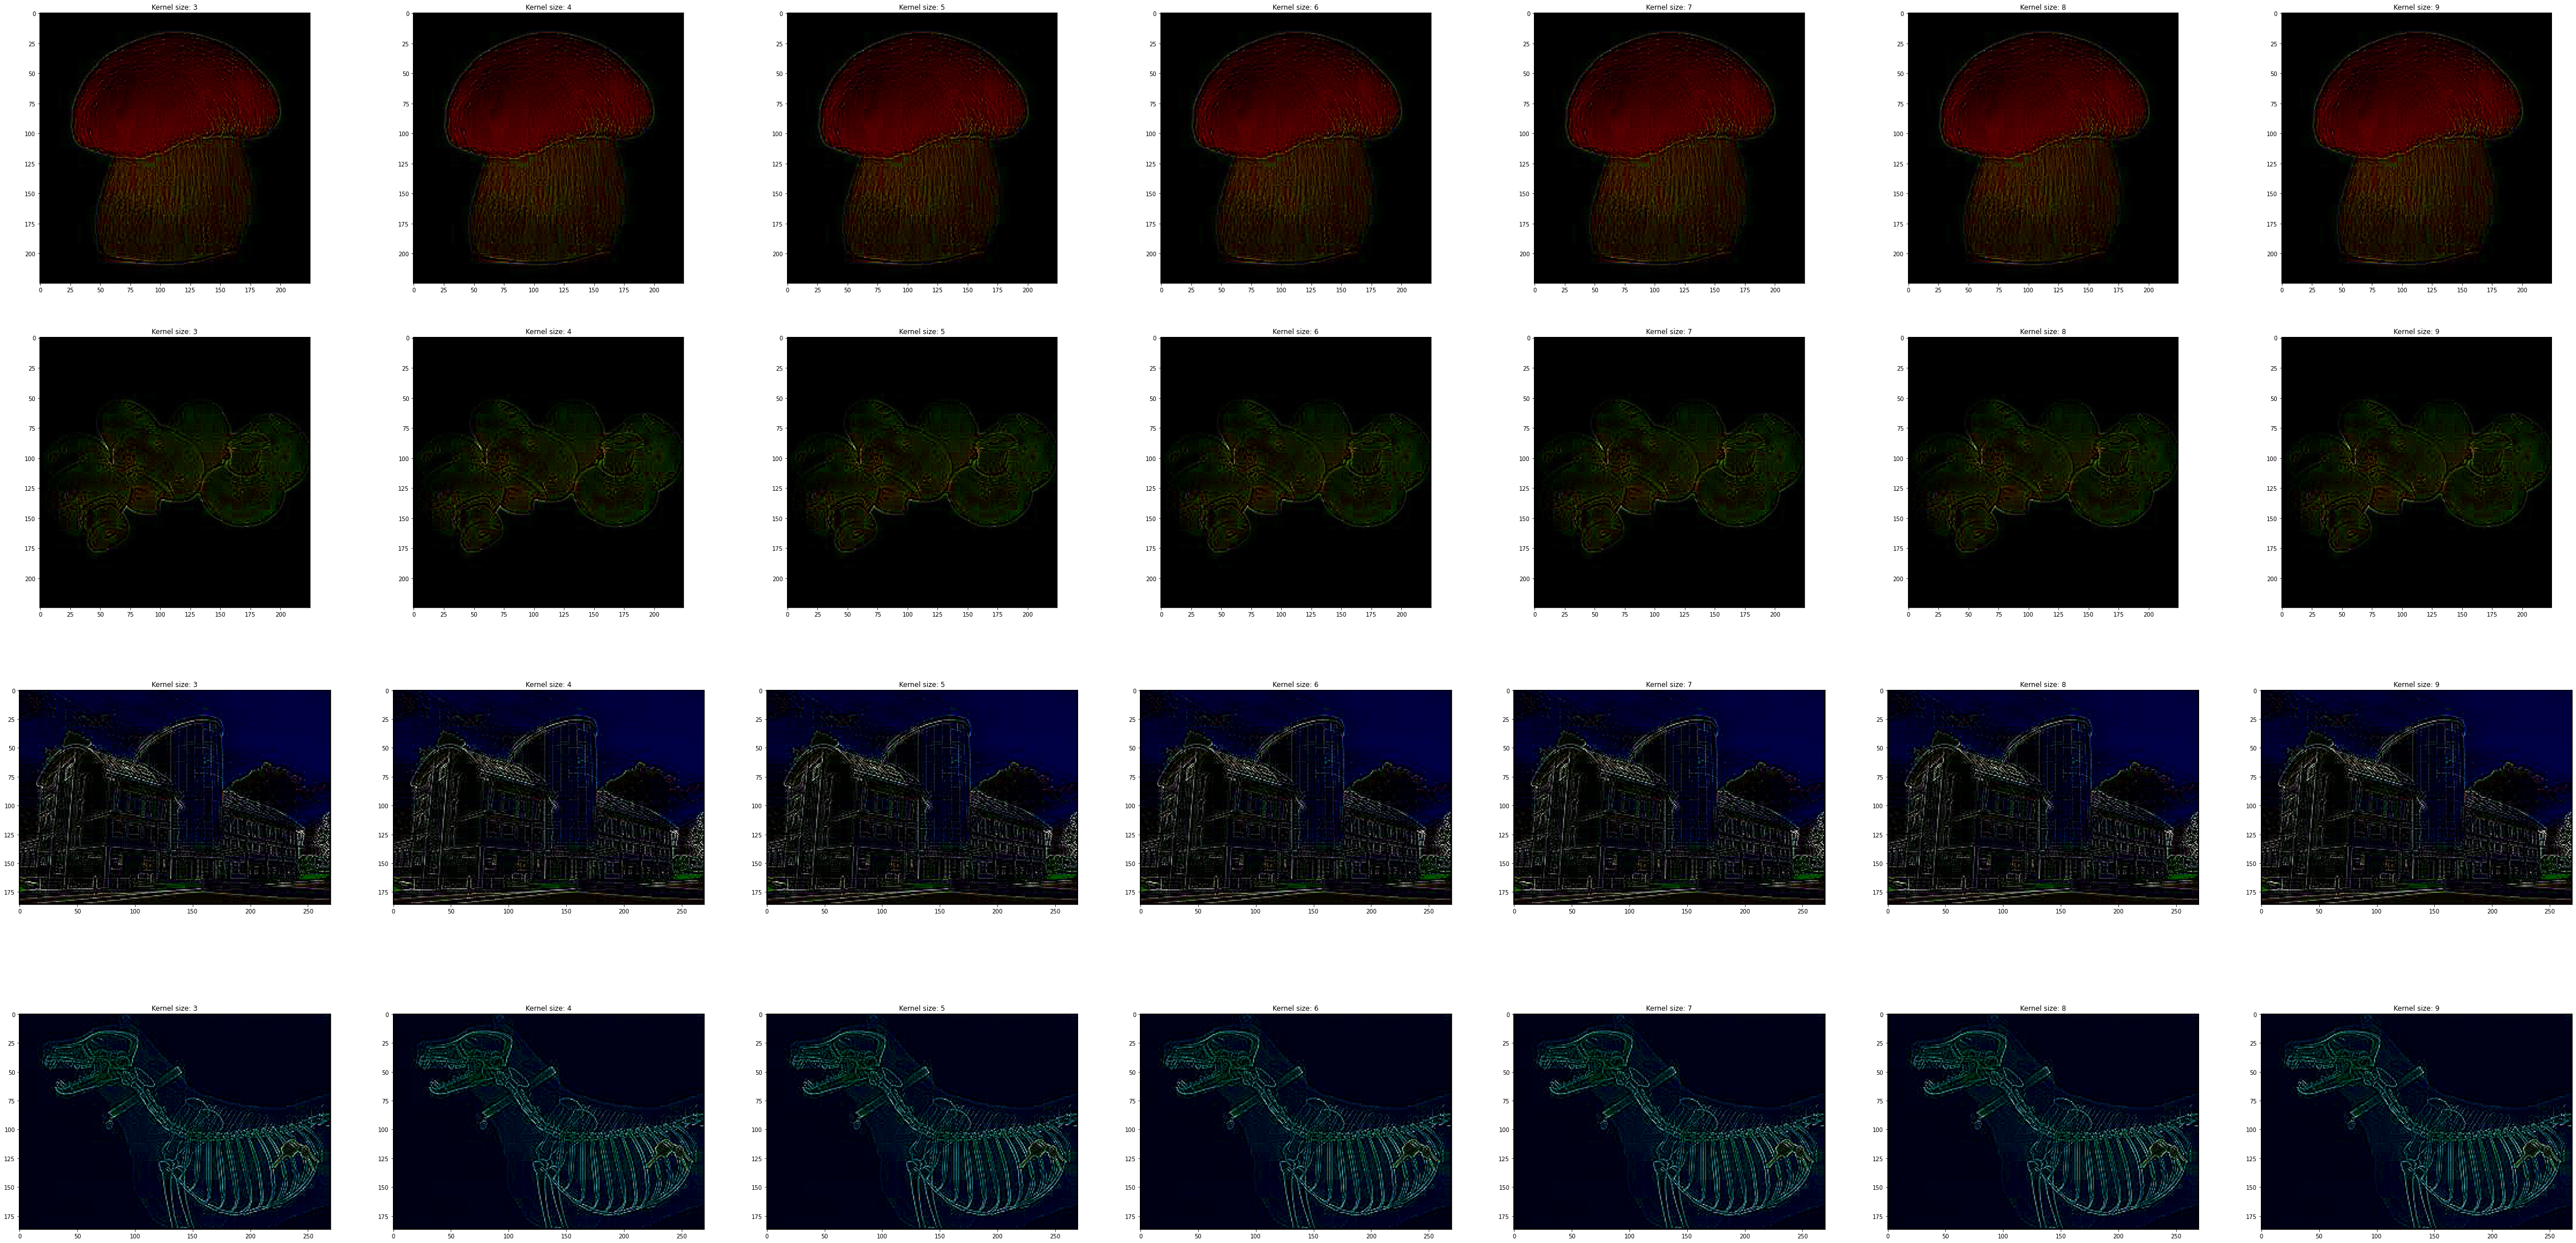

In [81]:
fig, axs = plt.subplots(nrows=len(images), ncols=len(ksize_range), figsize=(80, 40))

for i, j in itertools.product(range(len(images)), range(len(ksize_range))):
    axs[i][j].imshow(laplace_edges_images[i][j]);
    axs[i][j].set_title('Kernel size: {}'.format(ksize_range[j]))

### More detailed for each image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


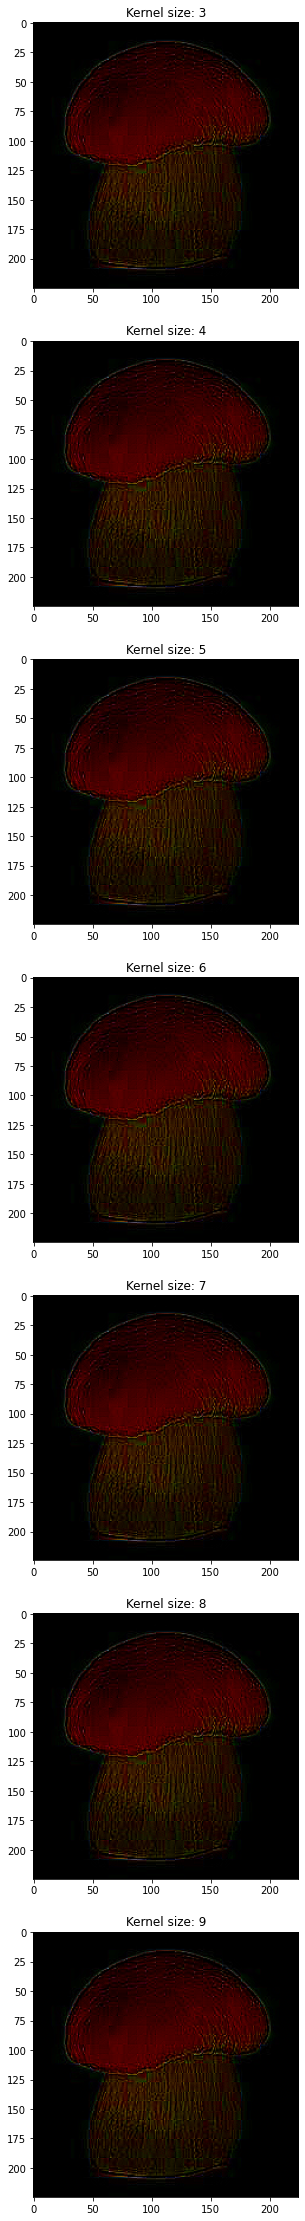

In [82]:
fig, axs = plt.subplots(nrows=len(ksize_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(laplace_edges_images[0]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Kernel size: {}'.format(ksize_range[idx]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


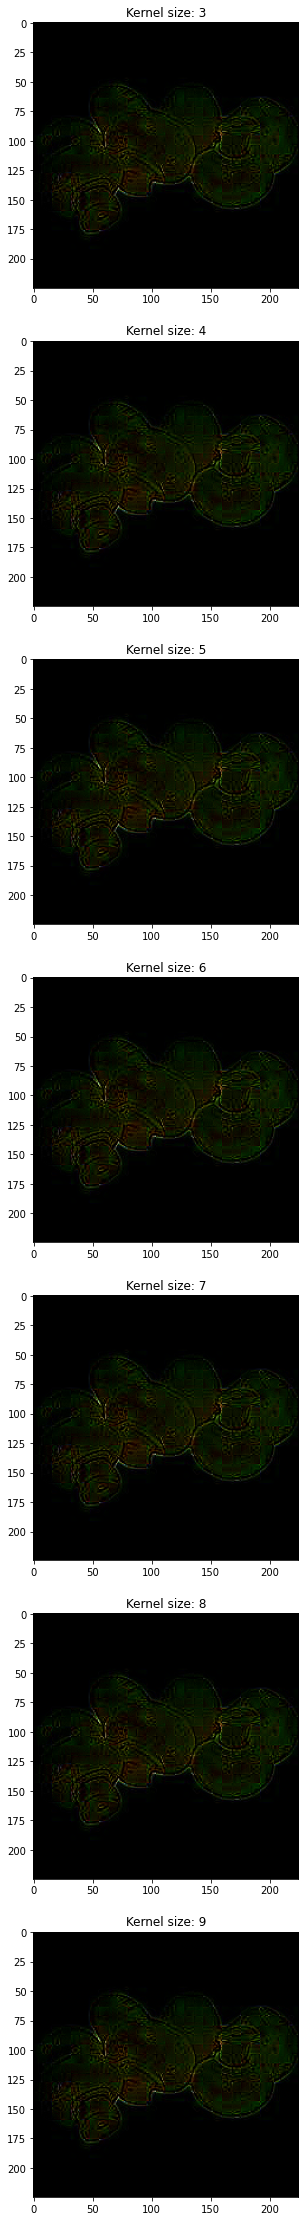

In [83]:
fig, axs = plt.subplots(nrows=len(ksize_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(laplace_edges_images[1]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Kernel size: {}'.format(ksize_range[idx]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


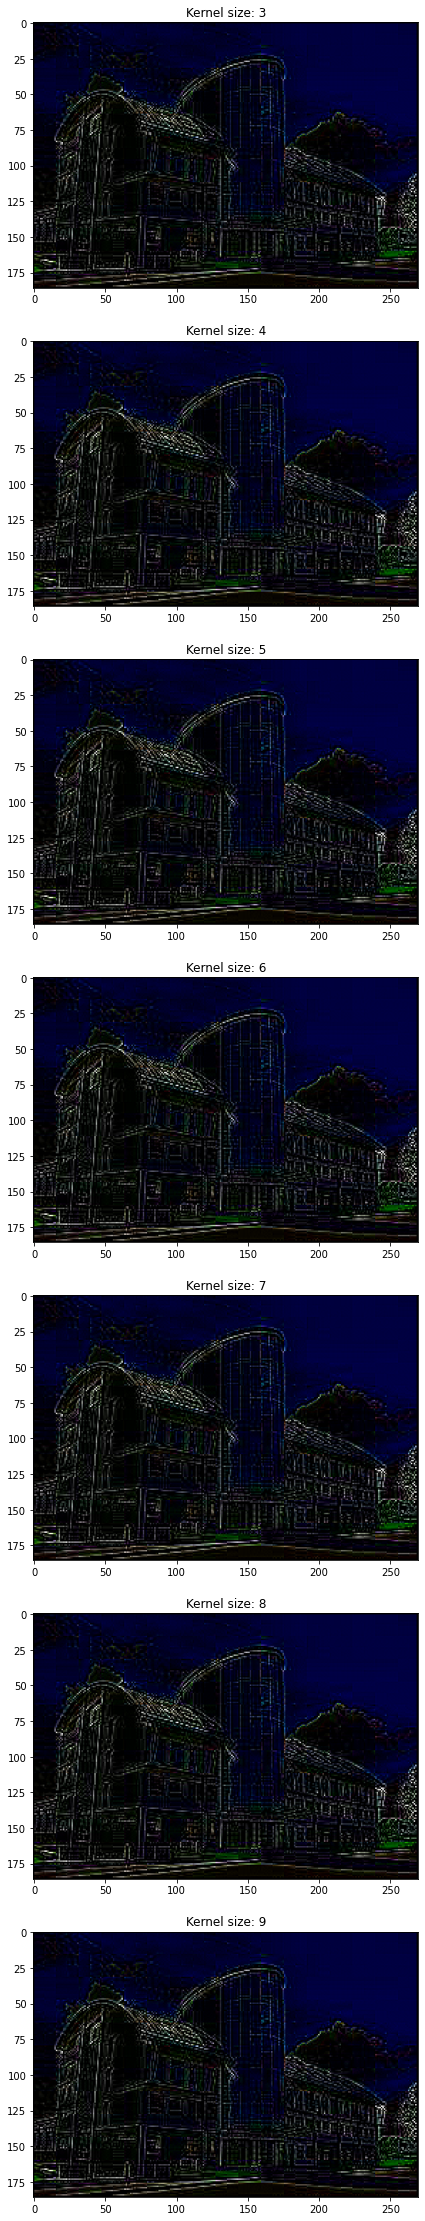

In [84]:
fig, axs = plt.subplots(nrows=len(ksize_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(laplace_edges_images[2]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Kernel size: {}'.format(ksize_range[idx]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


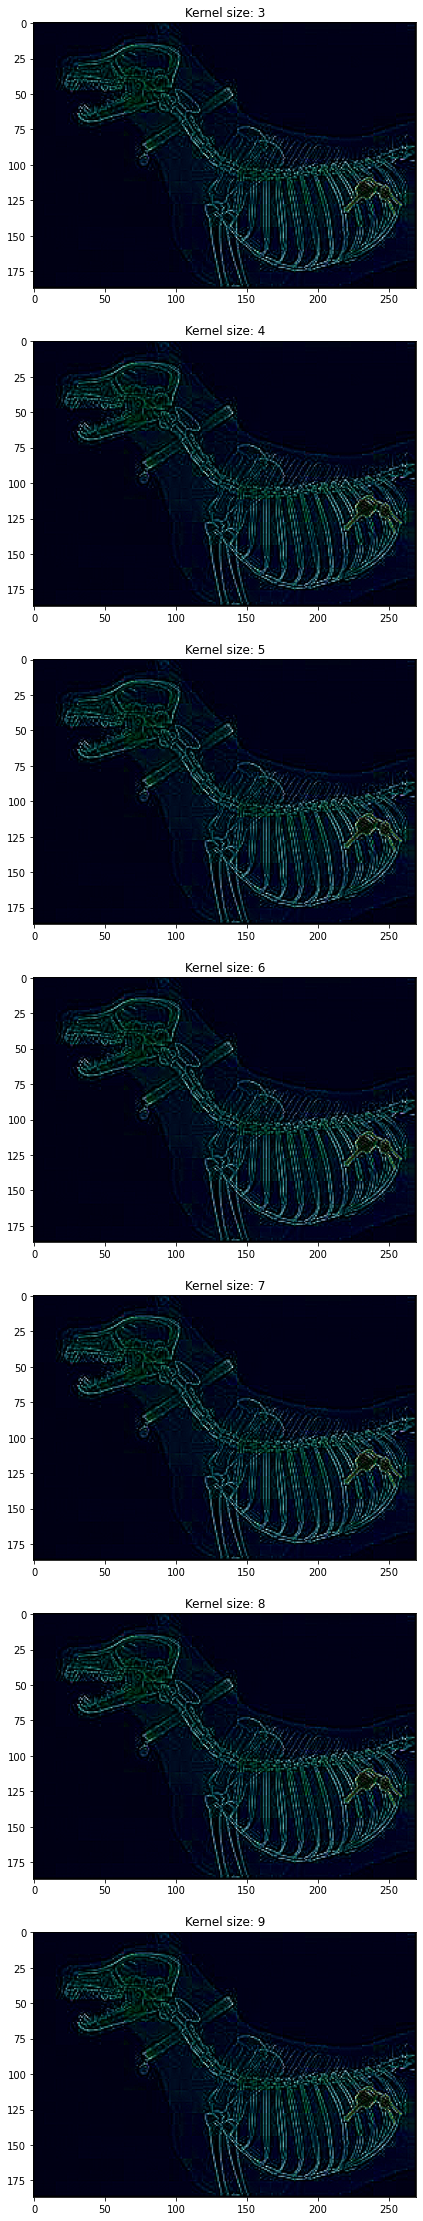

In [85]:
fig, axs = plt.subplots(nrows=len(ksize_range), ncols=1, figsize=(10, 40))

for idx, edge in enumerate(laplace_edges_images[3]):
    axs[idx].imshow(edge);
    axs[idx].set_title('Kernel size: {}'.format(ksize_range[idx]))

## Prewitt segmentation

In [86]:
def prewitt_segmentation(image, plot_edges=True, ax=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = prewitt(gray)
    
    if plot_edges:
        ax.imshow(edges);
    
    return edges

In [87]:
prewitt_edges_images = list(map(lambda x: prewitt_segmentation(x, plot_edges=False), images))

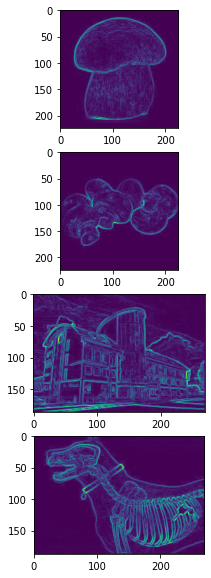

In [88]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    prewitt_segmentation(image, ax=axs[idx])

## Roberts segmentation

In [89]:
def roberts_segmentation(image, plot_edges=True, ax=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = roberts(gray)
    
    if plot_edges:
        ax.imshow(edges);
    
    return edges

In [90]:
roberts_edges_images = list(map(lambda x: roberts_segmentation(x, plot_edges=False), images))

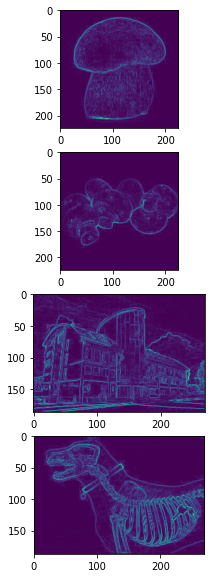

In [91]:
fig, axs = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 10))

for idx, image in enumerate(images):
    roberts_segmentation(image, ax=axs[idx])